### WORKSHOP 매출데이터 분석

In [70]:

import pandas as pd                   # 데이터 분석을 위한 모듈
import numpy as np                    #데이터 분석을 위한 모듈
import matplotlib.pyplot as plt       # 데이터 시각화를 위한 기본 모듈
import seaborn as sns                 # 데이터 시각화를 위한 추가 모듈
plt.rcParams['font.family'] = 'Malgun Gothic'    # 시각화를 위한 한글 폰트 지정


In [71]:
# 데이터를 메모리 읽어오기
df = pd.read_csv('./dataset/purchase_history.csv', encoding='cp949', sep=';', low_memory=False)
df.head()

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
0,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162.01,25441993984
1,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162.01,25441993984
2,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77.52,25447879424
3,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77.52,25447879424
4,2295716521449619559,2020,4,Sunday,17,furniture,kitchen,table,maestro,39.33,25450382848


In [3]:
# 데이터프레임의 정보를 출력하세요. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589365 entries, 0 to 1589364
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   주문번호    1589365 non-null  int64  
 1   연도      1589365 non-null  int64  
 2   월       1589365 non-null  int64  
 3   일       1589365 non-null  object 
 4   시간      1589365 non-null  int64  
 5   제품대분류   1589365 non-null  object 
 6   제품중분류   1589365 non-null  object 
 7   제품소분류   983269 non-null   object 
 8   브랜드     1589365 non-null  object 
 9   금액      1589365 non-null  float64
 10  고객번호    1589365 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 133.4+ MB


In [72]:
# 데이터 전처리 : 금액을 정수형으로 변환한다.
df['금액']=df['금액'].astype('int')
df

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
0,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162,25441993984
1,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162,25441993984
2,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77,25447879424
3,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77,25447879424
4,2295716521449619559,2020,4,Sunday,17,furniture,kitchen,table,maestro,39,25450382848
...,...,...,...,...,...,...,...,...,...,...,...
1589360,2388440981134693941,2020,11,Saturday,19,electronics,video,tv,lg,370,25513809920
1589361,2388440981134693942,2020,11,Saturday,19,electronics,smartphone,NaN,oppo,138,25514888704
1589362,2388440981134693943,2020,11,Saturday,19,electronics,smartphone,NaN,apple,418,25514891264
1589363,2388440981134693944,2020,11,Saturday,19,appliances,personal,scales,vitek,12,25514834176


In [8]:
# 다시한번 데이터 프레임의 정보를 출력하세요. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589365 entries, 0 to 1589364
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   주문번호    1589365 non-null  int64 
 1   연도      1589365 non-null  int64 
 2   월       1589365 non-null  int64 
 3   일       1589365 non-null  object
 4   시간      1589365 non-null  int64 
 5   제품대분류   1589365 non-null  object
 6   제품중분류   1589365 non-null  object
 7   제품소분류   983269 non-null   object
 8   브랜드     1589365 non-null  object
 9   금액      1589365 non-null  int32 
 10  고객번호    1589365 non-null  object
dtypes: int32(1), int64(4), object(6)
memory usage: 127.3+ MB


In [5]:
df.columns

Index(['주문번호', '연도', '월', '일', '시간', '제품대분류', '제품중분류', '제품소분류', '브랜드', '금액',
       '고객번호'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1589365, step=1)

In [7]:
df.shape

(1589365, 11)

### 데이터탐색

In [9]:
# 주문별 상품 구매 건수를 계산합니다.
df['주문번호'].value_counts()

주문번호
2348807739909603922    36
2353231151759360114    23
2353253137906664153    22
2348776417442922708    21
2353292714990109332    21
                       ..
2348786266062979769     1
2353258051416359778     1
2353258051567354723     1
2353258051684795236     1
2353265093426282757     1
Name: count, Length: 1168413, dtype: int64

In [10]:
# 3건이상 동시에 주문하는 건수에 대해 전체건수대비(위에서 구한건수) 비율을 구하세요. 
# 3건이상 동시주문건수 / 전체건수 
orderno = df['주문번호'].value_counts()
orderno[orderno > 3].shape[0]/orderno.shape[0]

0.027418387162758375

In [11]:
# 연도별 상품 구매 건수를 계산합니다.	
df['연도'].value_counts()

연도
2020    1578791
1970      10574
Name: count, dtype: int64

In [12]:
# 위에서 구한 연도별 상품구매건수를 보면 1970년이라는 비현실적인 데이터가 들어가 있습니다. 
# 1970년 데이터를 모두 지우려고 합니다. 
# 1970년도에 해당하는 데이터의 인덱스를 구하세요. 

idx1970 = df.loc[df.연도 == 1970].index
idx1970

Index([22750, 22751, 22752, 22753, 22754, 22755, 22756, 22757, 22758, 22759,
       ...
       39109, 39110, 39111, 39112, 39113, 39114, 39115, 39116, 39117, 39118],
      dtype='int64', length=10574)

In [13]:
# 위에서 구한 idx1970 데이터를 삭제하세요. 
df.drop(idx1970, inplace=True)
df

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
0,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162,25441993984
1,2294359932054536986,2020,4,Friday,20,electronics,tablet,NaN,samsung,162,25441993984
2,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77,25447879424
3,2294444024058086220,2020,4,Friday,23,electronics,audio,headphone,huawei,77,25447879424
4,2295716521449619559,2020,4,Sunday,17,furniture,kitchen,table,maestro,39,25450382848
...,...,...,...,...,...,...,...,...,...,...,...
1589360,2388440981134693941,2020,11,Saturday,19,electronics,video,tv,lg,370,25513809920
1589361,2388440981134693942,2020,11,Saturday,19,electronics,smartphone,NaN,oppo,138,25514888704
1589362,2388440981134693943,2020,11,Saturday,19,electronics,smartphone,NaN,apple,418,25514891264
1589363,2388440981134693944,2020,11,Saturday,19,appliances,personal,scales,vitek,12,25514834176


In [14]:
# 월별 상품 구매 건수를 계산합니다.	
df['월'].value_counts().sort_index() 

월
1     139783
2     171934
3     178217
4      42919
5     138053
6     234436
7     116881
8     208202
9     222483
10     77433
11     48450
Name: count, dtype: int64

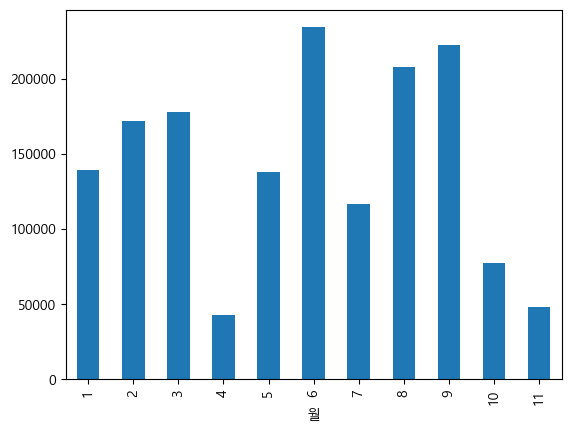

In [15]:
# 위에서 구한 월별 상품 구매 건수를 막대그래프로 시각화해보세요. 
# 판다스의 시각화 기능을 이용하세요. 
df['월'].value_counts().sort_index().plot.bar()
plt.show()

In [16]:
#일별 상품 구매건수를 계산합니다. 
df['일'].value_counts()

일
Saturday     240304
Friday       232417
Tuesday      230571
Sunday       224254
Monday       222162
Wednesday    218808
Thursday     210275
Name: count, dtype: int64

<Axes: xlabel='일'>

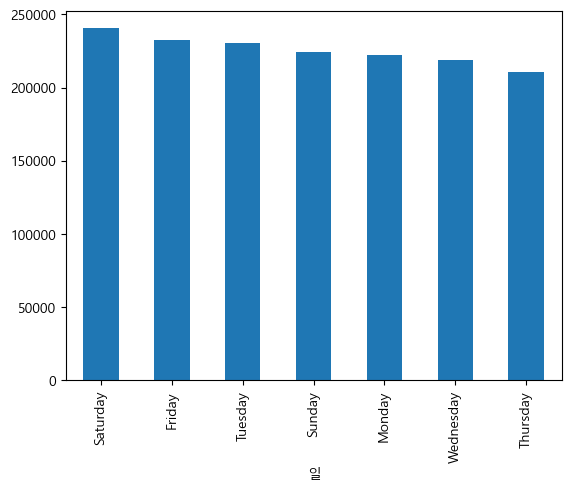

In [17]:
#일별 상품 구매건수에 대해 막대그래프로 시각화하세요. 

df['일'].value_counts().plot.bar()

In [18]:
#시간별 구매건수를 계산합니다.
df['시간'].value_counts().sort_index()	

시간
0      32081
1      16082
2       9764
3       7465
4       3943
5       2678
6       1930
7       2228
8       2586
9       2896
10      4240
11      6765
12     15349
13     65270
14    122532
15    150183
16    161493
17    162514
18    172519
19    178700
20    162915
21    132606
22    103803
23     58249
Name: count, dtype: int64

<Axes: xlabel='시간'>

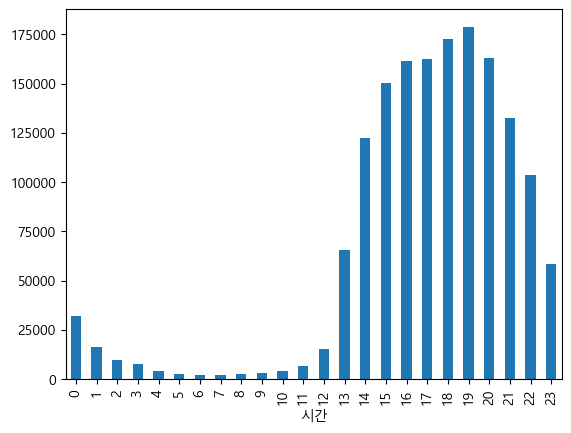

In [19]:
# 위에서 구한 시간별 구매건수에 대해 시각화 하세요. 

df['시간'].value_counts().sort_index().plot.bar()

In [20]:
#제품대분류별로 구매건수를 계산합니다. 

df['제품대분류'].value_counts()

제품대분류
appliances      605613
electronics     544564
computers       221388
furniture       120477
stationery       39280
accessories      13520
construction     12533
apparel           7634
kids              4981
medicine          3363
auto              3232
sport             1891
country_yard       315
Name: count, dtype: int64

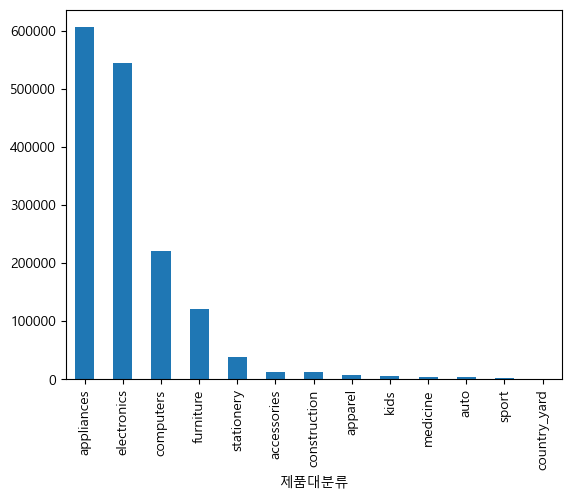

In [21]:
# 제품별대분류별 구매건수에 대해 막대그래프로 시각화하세요. 
df['제품대분류'].value_counts().plot.bar()
plt.show()

In [22]:
# 제품중분류별로 구매 건수를 계산합니다. 
df['제품중분류'].value_counts()	

제품중분류
kitchen            440478
smartphone         354848
environment        128287
peripherals         79277
video               71266
notebook            71103
audio               70404
personal            50000
components          43630
iron                39928
living_room         33264
battery             24725
network             23786
tablet              19492
bedroom             16214
clocks              15809
tools               15761
bag                 13486
telephone           11969
cartrige            10685
ironing_board        9462
sewing_machine       7505
glove                4606
paper                3679
accessories          3232
desktop              2480
skates               2359
tshirt               1740
toys                 1738
bicycle              1445
shirt                 961
ebooks                878
bathroom              769
dolls                 748
camera                733
gaming                369
trousers              297
trainer               219
tennis

<Axes: xlabel='제품중분류'>

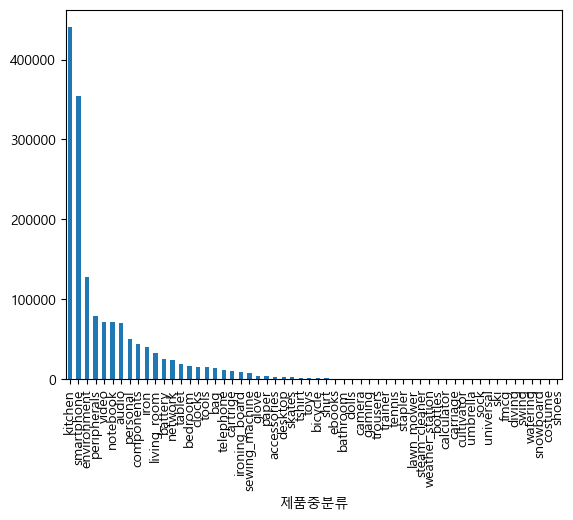

In [23]:
# 제품중분류별로 구매 건수를 계산한 결과를 막대그래프로 시각화하세요. 

df['제품중분류'].value_counts().plot.bar()

<Axes: xlabel='제품중분류'>

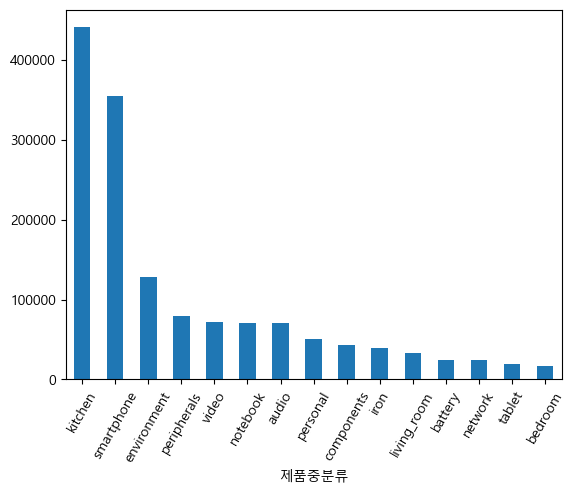

In [24]:
#위에서 구한 제품중분류별 그래프의 x축값이 너무 많습니다. 
# 가장 구매가 많은 상위 15개 품목만 시각화 하세요. 
# rot=60 옵션을 이용하여 x축 눈금을 회전시키세요. 

df['제품중분류'].value_counts().head(15).plot.bar(rot=60)

In [25]:
# 제품소분류별로 구매건수를 계산합니다.
df['제품소분류'].value_counts()


제품소분류
refrigerators    77023
tv               70995
vacuum           65983
headphone        65650
kettle           62309
                 ...  
toilet              54
sound_card          43
dictaphone          43
light               33
diapers             11
Name: count, Length: 79, dtype: int64

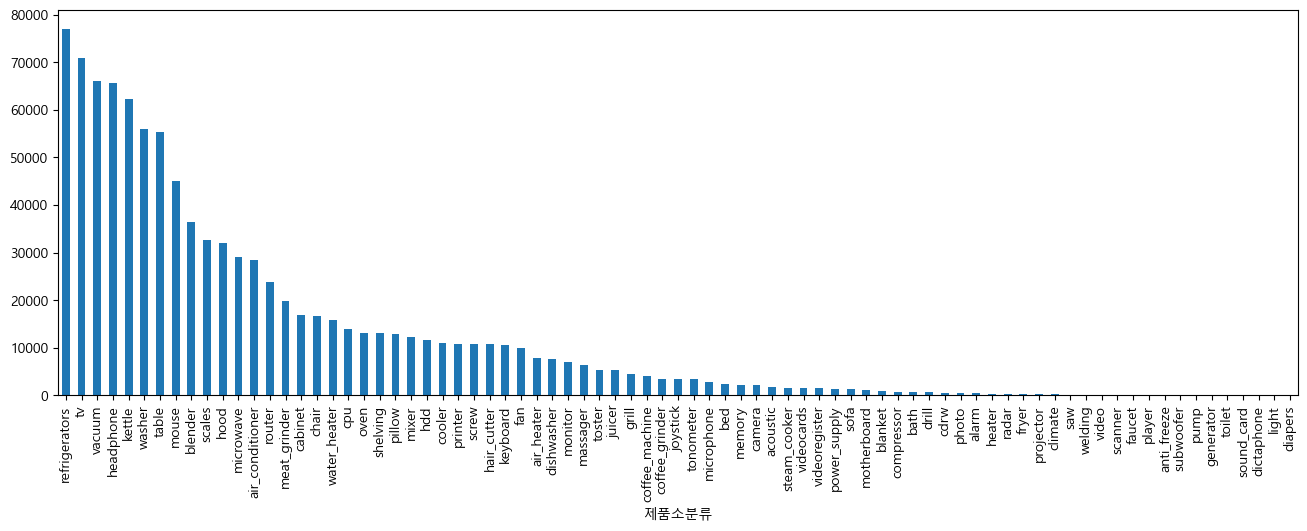

In [26]:
#위에서 구한 제품소분류별 구매건수에 대해 막대그래프로 시각화하세요. 
# 그래프 영역의 크기를 (16, 5) 로 설정하세요. 
df['제품소분류'].value_counts().plot.bar(figsize=(16,5))
plt.show()

In [27]:
#브랜드별로 구매건수를 계산합니다. 
df['브랜드'].value_counts()

브랜드
samsung    326751
ava         82154
apple       70034
tefal       63385
NONAME      56872
            ...  
billna          1
millet          1
orion           1
evere           1
zevs            1
Name: count, Length: 590, dtype: int64

<Axes: xlabel='브랜드'>

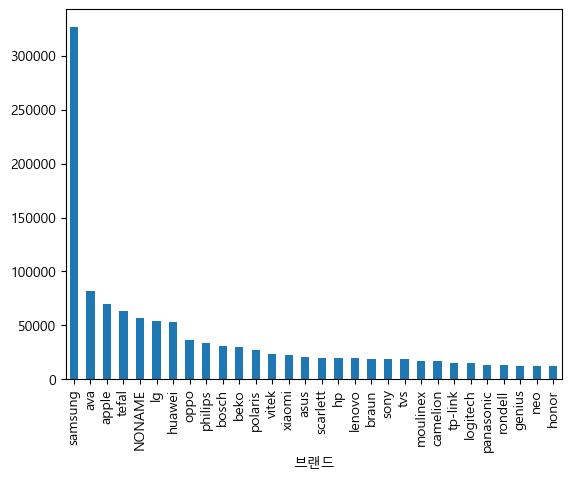

In [28]:
# 위에서 구한 브랜드별 구매건수를 막대그래프로 시각화 하세요. 
# 브랜드가 너무 많으니, 상위 30개만 뽑아 시각화 하세요. 

df['브랜드'].value_counts().head(30).plot.bar()

### 고객분석

In [29]:
# 고객별(고객번호별) 주문 건수를 계산합니다.
df['고객번호'].value_counts()

고객번호
NONAME         1144853
25512763648        478
25512763904        430
25512817152        429
25512422656        427
                ...   
25501795072          1
25503706368          1
25452319488          1
25501298944          1
25506494464          1
Name: count, Length: 91607, dtype: int64

<Axes: xlabel='고객번호'>

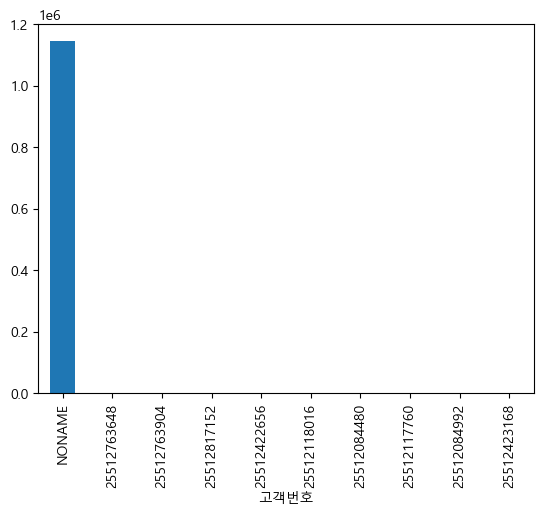

In [30]:
# 위의 고객번호별 주문건수에 대해 상위 10명만 추려 막대그래프로 시각화하세요. 
df['고객번호'].value_counts().head(10).plot.bar()

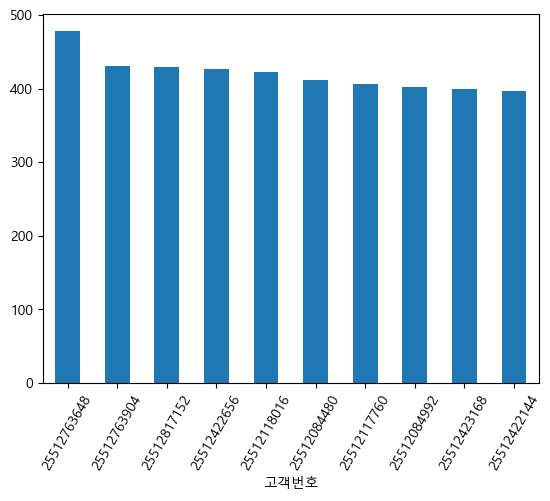

In [31]:
# 위의 결과에서 NONAME 정보가 너무 많습니다. NONAME을 제외하고 나머지 고객에 대해서, 고객번호변 주문건수의 상위 10명의 그래프를 그리세요.
df[df['고객번호'] != 'NONAME']['고객번호'].value_counts().head(10).plot.bar(rot=60)
plt.show()

In [32]:
# 고객번호중 NONAME을 제외한 고객을 추려서,  고객번호열과 금액열을 가지고 오세요.
 
customer_df = df[df['고객번호'] != 'NONAME'].loc[:, ['고객번호', '금액']]
customer_df

,고객번호,금액
0,25441993984,162
1,25441993984,162
2,25447879424,77
3,25447879424,77
4,25450382848,39
...,...,...
1589360,25513809920,370
1589361,25514888704,138
1589362,25514891264,418
1589363,25514834176,12


In [33]:
# VIP 고객을 추려봅시다. 고객별 합산금액이 큰 상위 10명을 추리세요. 
vip = customer_df.groupby('고객번호').sum().sort_values('금액', ascending=False).head(10)
vip

,금액
고객번호,
25512763648,111831
25512817152,95266
25512763904,91209
25512817408,85467
25513695744,83491
25512422656,79657
25512084480,75227
25512118016,73782
25513284864,71856


In [34]:
#vip 데이터의 인덱스를 리스트형으로 바꾸어 출력하세요. 힌트: tolist 함수
viplist = vip.index.tolist()
viplist

['25512763648',
 '25512817152',
 '25512763904',
 '25512817408',
 '25513695744',
 '25512422656',
 '25512084480',
 '25512118016',
 '25513284864',
 '25512084736']

In [35]:
# 원본 df 에서 viplist만 추려서, 고객번호, 금액을 출력하세요.   힌트: isin 함수 
vipdf = df.loc[df['고객번호'].isin(viplist), ['고객번호', '금액']]
vipdf 

,고객번호,금액
1469166,25512084480,173
1469168,25512084480,11
1469169,25512084480,57
1469170,25512084480,4
1469171,25512084480,9
...,...,...
1587171,25512817408,28
1588098,25512763648,87
1588218,25512817152,46
1588424,25512763648,219


In [36]:
# 고객번호별 합산, 평균, 표준편차를 출력하세요. 
cvdf = vipdf.groupby('고객번호').agg([np.sum, np.mean, np.std])
cvdf

금액                        
                sum        mean         std
고객번호                                       
25512084480   75227  183.034063  290.905959
25512084736   71613  193.026954  313.108442
25512118016   73782  174.425532  226.958696
25512422656   79657  186.550351  227.117132
25512763648  111831  233.956067  239.675978
25512763904   91209  212.113953  270.409874
25512817152   95266  222.065268  320.162518
25512817408   85467  216.372152  301.913266
25513284864   71856  190.095238  252.368350
25513695744   83491  233.215084  302.718544

In [37]:
# cvdf의 컬럼을 출력하세요. 
cvdf.columns

MultiIndex([('금액',  'sum'),
            ('금액', 'mean'),
            ('금액',  'std')],
           )

In [38]:
# 그룹바이 결과로 멀티인덱스로 잡혀있는 컬럼을 싱글컬럼인덱스로 변경하세요. 힌트 : droplevel 함수이용
cvdf.columns = cvdf.columns.droplevel()
cvdf.columns

Index(['sum', 'mean', 'std'], dtype='object')

In [39]:
# 고객마다 cv(coefficient of variation)를 구해서 'cv'라는 컬럼에 추가하세요. 
# cv는 표준편차 / 평균 으로 계산합니다. 
cvdf['cv'] =  cvdf['std'] / cvdf['mean']
cvdf

,sum,mean,std,cv
고객번호,,,,
25512084480,75227,183.034063,290.905959,1.589354
25512084736,71613,193.026954,313.108442,1.622097
25512118016,73782,174.425532,226.958696,1.301178
25512422656,79657,186.550351,227.117132,1.217458
25512763648,111831,233.956067,239.675978,1.024449
25512763904,91209,212.113953,270.409874,1.274833
25512817152,95266,222.065268,320.162518,1.441750
25512817408,85467,216.372152,301.913266,1.395343
25513284864,71856,190.095238,252.368350,1.327589


In [40]:
# 위의 데이터프레임에서 cv값을 오름차순으로 정렬하세요.  
cvdf.sort_values('cv')

,sum,mean,std,cv
고객번호,,,,
25512763648,111831,233.956067,239.675978,1.024449
25512422656,79657,186.550351,227.117132,1.217458
25512763904,91209,212.113953,270.409874,1.274833
25513695744,83491,233.215084,302.718544,1.298023
25512118016,73782,174.425532,226.958696,1.301178
25513284864,71856,190.095238,252.368350,1.327589
25512817408,85467,216.372152,301.913266,1.395343
25512817152,95266,222.065268,320.162518,1.441750
25512084480,75227,183.034063,290.905959,1.589354


### 브랜드분석

In [41]:
# 금액이 가장 큰 데이터 6개를 출력하세요.
df.sort_values('금액', ascending=False)

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
647092,2353234364520727464,2020,5,Tuesday,17,electronics,video,tv,samsung,50925,NONAME
22280,2339244674033647628,2020,6,Thursday,19,electronics,video,tv,NONAME,18328,25465546752
22604,2339940319191106553,2020,6,Friday,18,electronics,video,tv,NONAME,13310,25465546752
920987,2353288509000777918,2020,7,Friday,20,electronics,video,tv,lg,11574,25484619008
652286,2353235498996073224,2020,5,Wednesday,15,electronics,video,tv,lg,11574,NONAME
...,...,...,...,...,...,...,...,...,...,...,...
136837,2348777215258264502,2020,1,Wednesday,21,stationery,battery,NaN,camelion,0,NONAME
816233,2353266124134548259,2020,6,Tuesday,19,stationery,battery,NaN,varta,0,NONAME
254136,2348792681947202363,2020,2,Tuesday,19,appliances,kitchen,refrigerators,organ,0,NONAME
745679,2353253518732689865,2020,6,Sunday,16,appliances,kitchen,refrigerators,organ,0,NONAME


In [42]:
# 브랜드별 매출을 계산합니다.
result=df.groupby('브랜드')['금액'].sum().sort_values(ascending=False)
result

브랜드
samsung      88528729
apple        47360965
lg           25574717
asus         10591072
huawei       10463612
               ...   
rossija             0
hoco                0
chistotel           0
att                 0
pedigree            0
Name: 금액, Length: 590, dtype: int32

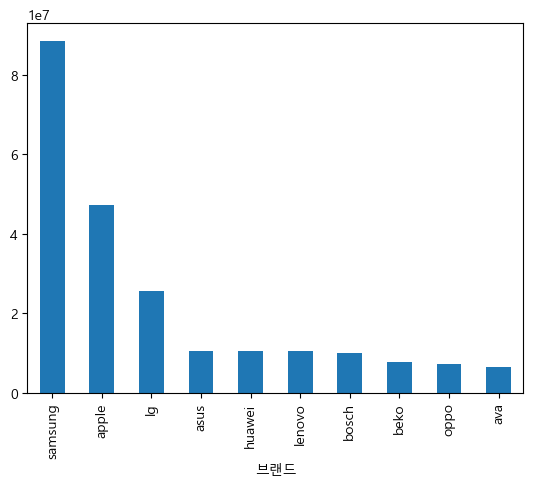

In [43]:
# 브랜드별 매출 상위 10위를 시각화합니다.

result.head(10).plot(kind='bar')
plt.show()



In [44]:
# 브랜드별 평균 매출을 계산합니다.
result=df.groupby('브랜드')['금액'].mean().sort_values(ascending=False)
result

브랜드
yamaguchi    6215.000000
technogym    3674.333333
gewa         3261.000000
hitachi      2029.375000
liebherr     1954.590909
                ...     
intex           0.000000
pedigree        0.000000
rossija         0.000000
reno            0.000000
chistotel       0.000000
Name: 금액, Length: 590, dtype: float64

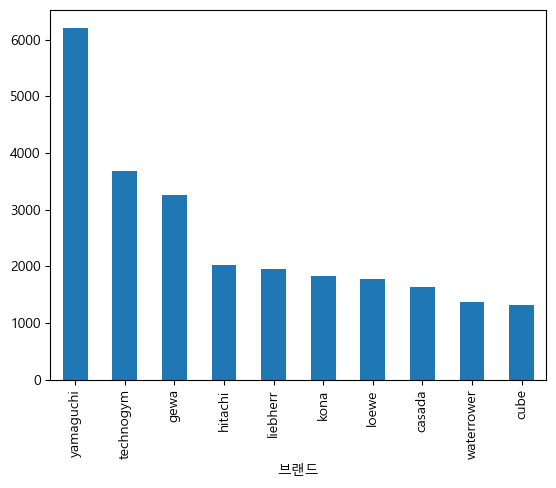

In [45]:
# 브랜드별 평균 매출 상위 10위를 시각화합니다.
result.head(10).plot(kind='bar')
plt.show()

In [46]:
# 브랜드별, 제품대분류별 금액의 평균, 표준편차를 구하세요. 
# 평균으로 내림차순 정렬하여 상위 20개만 출력하세요. 
df.groupby(['브랜드', '제품대분류'])['금액'].agg([np.mean, np.std]).sort_values('mean',ascending=False).head(20)


,,mean,std
브랜드,제품대분류,,
yamaguchi,furniture,6215.000000,NaN
technogym,sport,4390.200000,232.103856
casada,computers,3893.133333,550.465500
gewa,electronics,3261.000000,0.000000
nvidia,computers,3246.000000,0.000000
samsung,furniture,2314.000000,0.000000
lg,furniture,2037.565217,83.638196
hitachi,appliances,2029.375000,372.069147
liebherr,appliances,1954.590909,440.274553


In [47]:
# 위의 결과에서 표준편차가 나오지 않은 yamaguchi 브랜드의 데이터를  df에서 찾아 출력하세요.  
df.loc[df.브랜드 == 'yamaguchi']

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
9540,2313768631835558379,2020,5,Thursday,15,furniture,living_room,chair,yamaguchi,6215,25457453568


In [48]:

# 브랜드별, 제품중분류별 금액의 평균, 표준편차를 구하세요. 
# 평균으로 내림차순 정렬하여 상위 20개만 출력하세요. 
df.groupby(['브랜드', '제품중분류'])['금액'].agg([np.mean, np.std]).sort_values('mean',ascending=False).head(20)


,,mean,std
브랜드,제품중분류,,
NONAME,video,15819.000000,3548.261828
lg,smartphone,9606.000000,NaN
yamaguchi,living_room,6215.000000,NaN
technogym,trainer,4390.200000,232.103856
casada,peripherals,3893.133333,550.465500
gewa,camera,3261.000000,0.000000
nvidia,components,3246.000000,0.000000
samsung,living_room,2314.000000,0.000000
apple,desktop,2102.706897,915.260897


In [49]:
# 브랜드별, 제품중분류별, 제품대분류별 금액의 평균, 표준편차를 구하세요. 
# 평균으로 내림차순 정렬하여 상위 20개만 출력하세요. 
brandf = df.groupby(['브랜드', '제품소분류', '제품대분류'])['금액'].agg([np.mean, np.std]).sort_values('mean',ascending=False).head(20)
brandf

,,,mean,std
브랜드,제품소분류,제품대분류,,
NONAME,tv,electronics,15819.000000,3548.261828
yamaguchi,chair,furniture,6215.000000,NaN
casada,keyboard,computers,3893.133333,550.465500
gewa,video,electronics,3261.000000,0.000000
nvidia,videocards,computers,3246.000000,0.000000
smeg,refrigerators,appliances,2847.000000,NaN
samsung,cabinet,furniture,2314.000000,0.000000
aeg,washer,appliances,2080.846154,377.037541
loewe,tv,electronics,2064.800000,1609.853627


In [50]:
# brandf의 cv(변동계수) 컬럼을 새로 만들고 변동계수를 계산하여 추가하세요. 
brandf['cv'] = brandf['std']/brandf['mean']
brandf

,,,mean,std,cv
브랜드,제품소분류,제품대분류,,,
NONAME,tv,electronics,15819.000000,3548.261828,0.224304
yamaguchi,chair,furniture,6215.000000,NaN,NaN
casada,keyboard,computers,3893.133333,550.465500,0.141394
gewa,video,electronics,3261.000000,0.000000,0.000000
nvidia,videocards,computers,3246.000000,0.000000,0.000000
smeg,refrigerators,appliances,2847.000000,NaN,NaN
samsung,cabinet,furniture,2314.000000,0.000000,0.000000
aeg,washer,appliances,2080.846154,377.037541,0.181194
loewe,tv,electronics,2064.800000,1609.853627,0.779666


In [51]:
# cv별로 오름차순으로 정렬하세요. 
brandf.sort_values('cv')

,,,mean,std,cv
브랜드,제품소분류,제품대분류,,,
gewa,video,electronics,3261.000000,0.000000,0.000000
nvidia,videocards,computers,3246.000000,0.000000,0.000000
samsung,cabinet,furniture,2314.000000,0.000000,0.000000
cilek,cabinet,furniture,1444.000000,0.000000,0.000000
kitchenaid,dishwasher,appliances,1851.000000,0.000000,0.000000
lg,cabinet,furniture,2037.565217,83.638196,0.041048
casada,keyboard,computers,3893.133333,550.465500,0.141394
aeg,washer,appliances,2080.846154,377.037541,0.181194
hitachi,refrigerators,appliances,2029.375000,372.069147,0.183342


### 요일분석

In [52]:
# 요일별 평균 거래 건수와 금액 정보를 계산합니다.
daily = df.groupby('일')['금액'].agg(['count', 'sum'])
daily

,count,sum
일,,
Friday,232417,45015046
Monday,222162,42088127
Saturday,240304,46780097
Sunday,224254,43913407
Thursday,210275,39163548
Tuesday,230571,42787477
Wednesday,218808,40544623


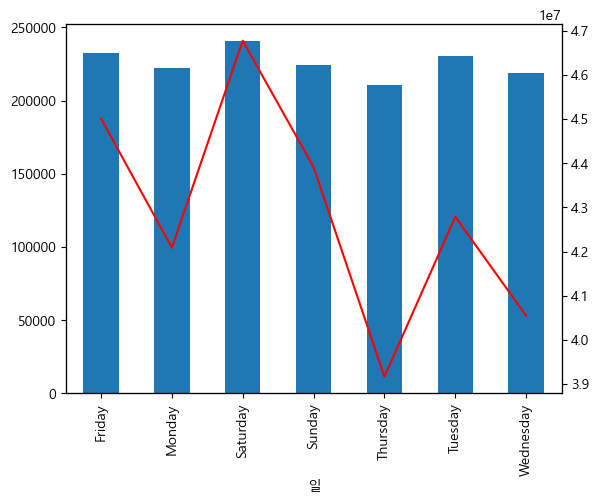

In [53]:
# 계산된 정보를 이용하여 데이터를 시각화 합니다.
fig, axis_y1 = plt.subplots() # Figure 객체 정의 (Figure == 도화지)
axis_y2 = axis_y1.twinx() # Figure 객체의 Y축을 복사 -> 이중 축 설정 -> 좌우 축 추가 
daily['sum'].plot(kind='line', secondary_y=True, ax=axis_y2, c='red') # 라인 차트 시각화
daily['count'].plot(kind='bar', stacked=True, ax=axis_y1)
plt.show()

In [54]:
# 시간별 평균 거래건수와 금액 정보를 계산합니다.
hourly = df.groupby('시간')['금액'].agg(['count', 'sum'])
hourly

,count,sum
시간,,
0,32081,7935506
1,16082,4615736
2,9764,2934458
3,7465,2151117
4,3943,1222274
5,2678,823625
6,1930,628602
7,2228,662002
8,2586,755790


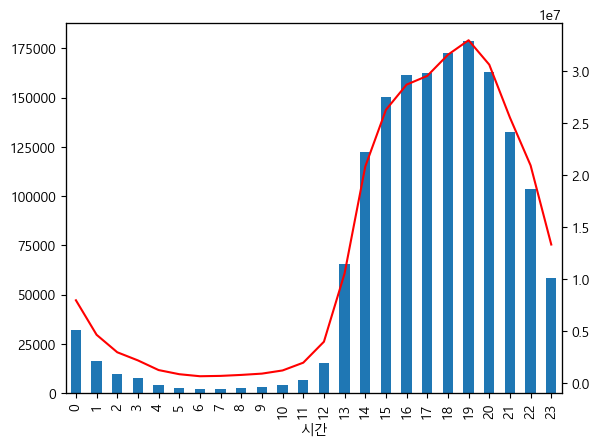

In [55]:
# 두개의 겹쳐진그래프를 출력하세요. 
# hourly의 sum 은 라인그래프로 출력하세요. secondary_y=True, ax=ax1, c='red'
# hourly의 count는 막대그래프로 출력하세요. stacked=True, ax=ax0

fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
hourly['sum'].plot(kind='line', secondary_y=True, ax=ax1, c='red')
hourly['count'].plot(kind='bar', stacked=True, ax=ax0)
plt.show()

In [56]:
# 제품대분류 유형별 개수를 계산하여 상위 5개를 출력하세요.
df['제품대분류'].value_counts().head()
# 가전제품, 전자제품(태블릿,핸드폰등), 컴퓨터, 가구, 문구류 등 순으로 매출 발생

제품대분류
appliances     605613
electronics    544564
computers      221388
furniture      120477
stationery      39280
Name: count, dtype: int64

In [57]:
# 제품중분류 유형별 개수를 계산하여 상위 5개를 출력하세요.
df['제품중분류'].value_counts().head()

제품중분류
kitchen        440478
smartphone     354848
environment    128287
peripherals     79277
video           71266
Name: count, dtype: int64

In [58]:
# 특정 컬럼의 값이 궁금할 때
df[df['제품중분류']=='environment']

,주문번호,연도,월,일,시간,제품대분류,제품중분류,제품소분류,브랜드,금액,고객번호
64,2298030363735228851,2020,4,Wednesday,22,appliances,environment,air_heater,ava,11,25451561728
87,2298054179261776552,2020,4,Wednesday,23,appliances,environment,vacuum,thomas,15,25452247552
89,2298057884467986457,2020,4,Wednesday,23,appliances,environment,water_heater,ariston,118,25452244992
97,2298061556522418577,2020,4,Wednesday,23,appliances,environment,vacuum,samsung,69,25449335296
139,2298121410213577508,2020,4,Thursday,1,appliances,environment,water_heater,ariston,118,25452244992
...,...,...,...,...,...,...,...,...,...,...,...
1589317,2388440981134693900,2020,11,Saturday,17,appliances,environment,fan,ava,11,25514886656
1589332,2388440981134693912,2020,11,Saturday,18,appliances,environment,air_heater,ava,43,25486174720
1589342,2388440981134693922,2020,11,Saturday,18,appliances,environment,vacuum,samsung,69,25505554432
1589350,2388440981134693931,2020,11,Saturday,18,appliances,environment,air_heater,ava,43,25449876224


In [59]:
# 제품소분류 유형별 개수를 계산하여 상위 5개를 출력하세요.
df['제품소분류'].value_counts().head()

제품소분류
refrigerators    77023
tv               70995
vacuum           65983
headphone        65650
kettle           62309
Name: count, dtype: int64

In [60]:
# 통계 분석 : 제품 대분류별, 제품중분류별 판매 금액의 합계 금액과 평균 금액를 계산합니다.
sales=df.groupby(['제품대분류', '제품중분류'])['금액'].agg(['mean', 'sum'])
sales

mean      sum
제품대분류       제품중분류                        
accessories bag        18.808542   253652
            umbrella   66.470588     2260
apparel     costume    21.000000       42
            glove     399.329570  1839312
            shirt      31.498439    30270
...                          ...      ...
sport       trainer   291.840183    63913
stationery  battery     2.724328    67359
            cartrige   12.068975   128957
            paper       4.087796    15039
            stapler    28.507853     5445

[61 rows x 2 columns]

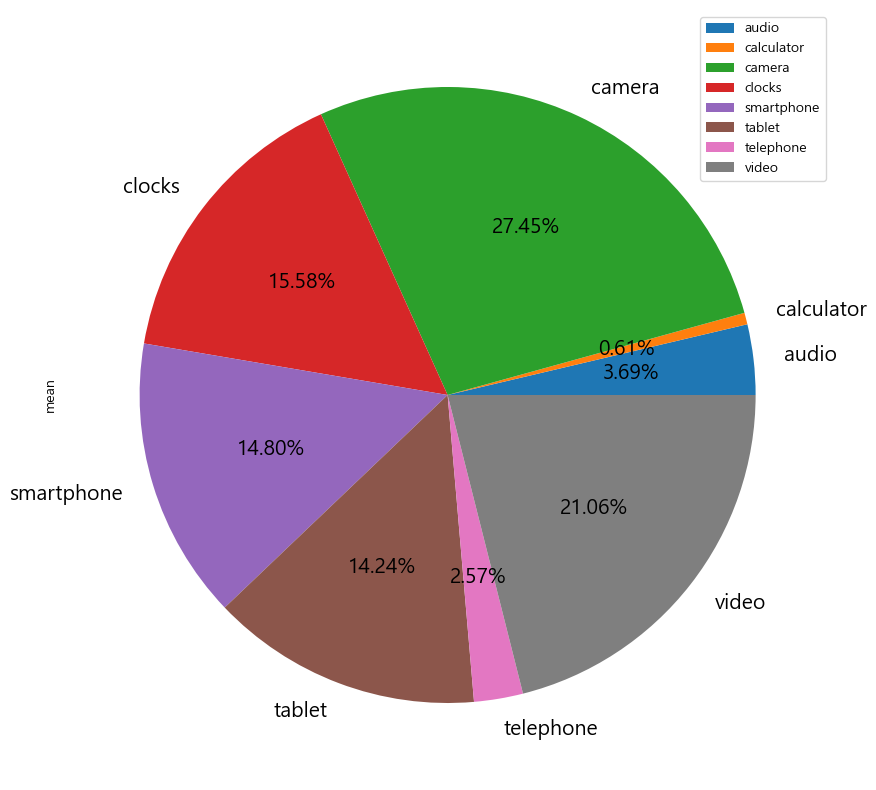

In [61]:
# 제품대분류가 전자제품인 제품중분류별 매출평균을 파이차트로 시각화 하세요.  
# 힌트: figsize=(10, 10), autopct='%.2f%%', fontsize=15 
electronics = sales.loc['electronics', :]
electronics.plot.pie(y='mean', figsize=(10, 10), autopct='%.2f%%', fontsize=15)     
plt.show()

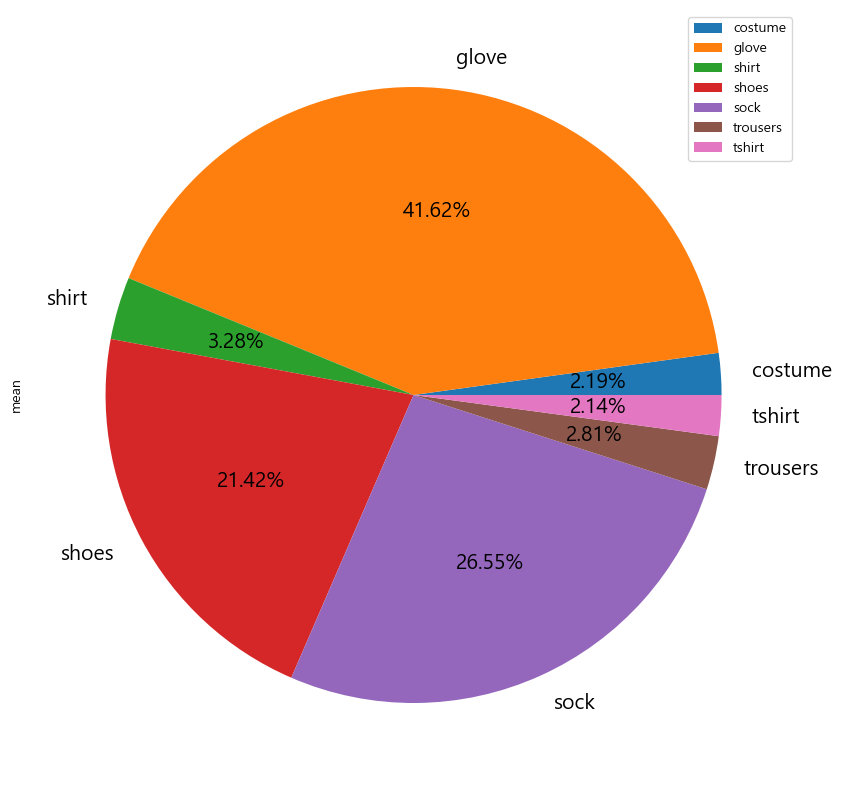

In [62]:
# 제품대분류가 의류(apparel)인, 제품중분류별 매출평균을 파이차트로 시각화하세요. 
apparel = sales.loc['apparel', :]
apparel.plot.pie(y='mean', figsize=(10, 10), autopct='%.2f%%', fontsize=15)      
plt.show()

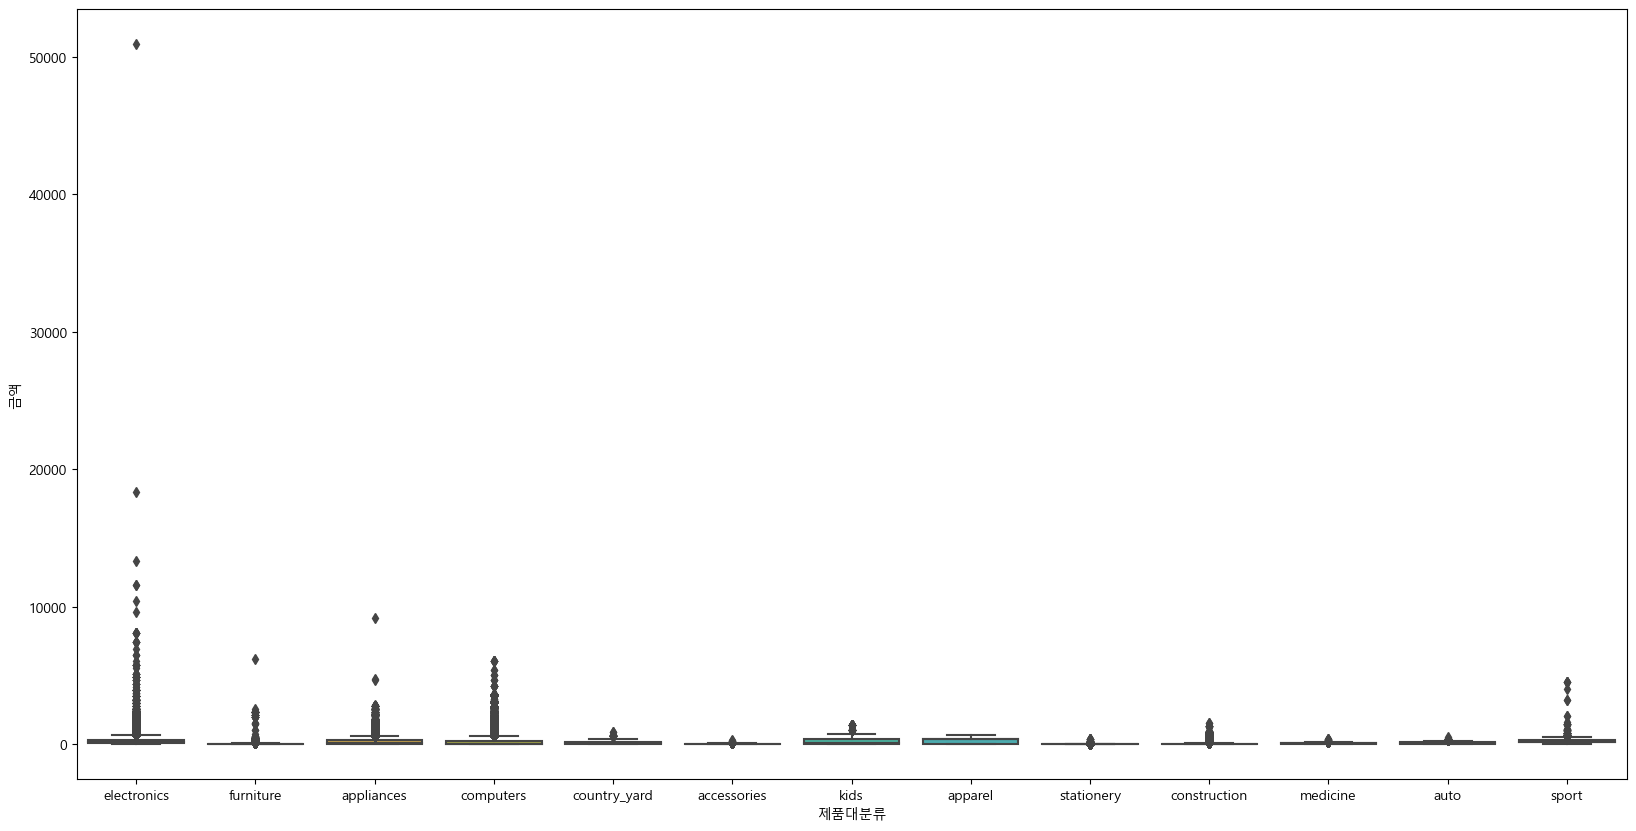

In [63]:
# 제품 대분류별 금액의 분포와 이상치를 박스플랏으로 시각화하세요. 
# seaborn의 박스플랏을 이용해보세요. 
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='제품대분류', y='금액')
plt.show()

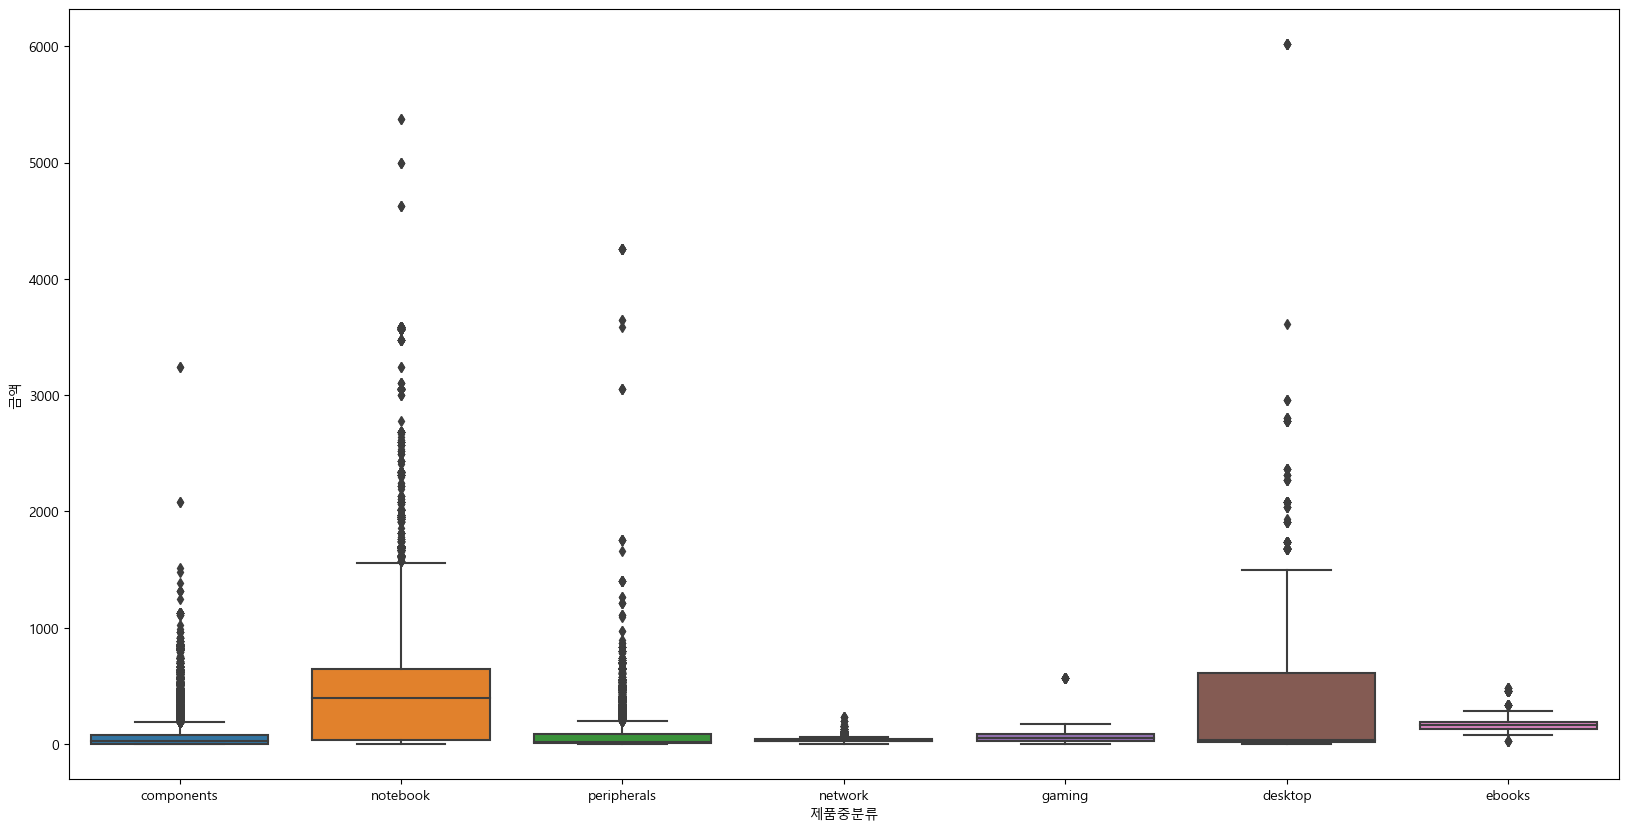

In [64]:
# 제품대분류가 computers 인 제품들을 추출하고,  computers 제품들의  제품중분류별 금액을 boxplot으로 그려보자.
# seaborn의 boxplot을 이용해보세요.

computers = df[df['제품대분류'] == 'computers']
plt.figure(figsize=(20, 10))
sns.boxplot(data=computers, x='제품중분류', y='금액')
plt.show()

### 매출금액분석

In [65]:
# df의 금액컬럼에 대해 왜도를 구하세요. 

from scipy.stats import skew
skew(df['금액'])

8.506988859725782

In [66]:
# df의 금액컬럼에 대해 첨도를 구하세요.

from scipy.stats import kurtosis
kurtosis(df['금액'], fisher=True)

961.2663157996878

(0.0, 5000.0, 0.0, 600000.0)

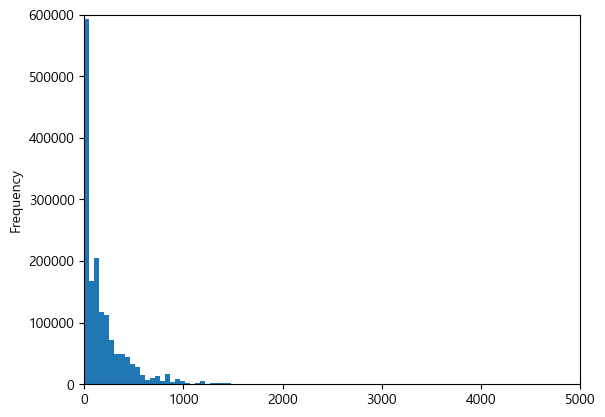

In [67]:
# 금액컬럼에 대해 히스그램을 출력하세요. 판다스의 히스토그램을 이용하세요. 
# bins는 1000으로 설정.  x축범위 : 0 ~ 5000, y축범위: 0 ~ 600000
df['금액'].plot.hist(bins=1000)
plt.axis([0, 5000, 0, 600000])

<Axes: >

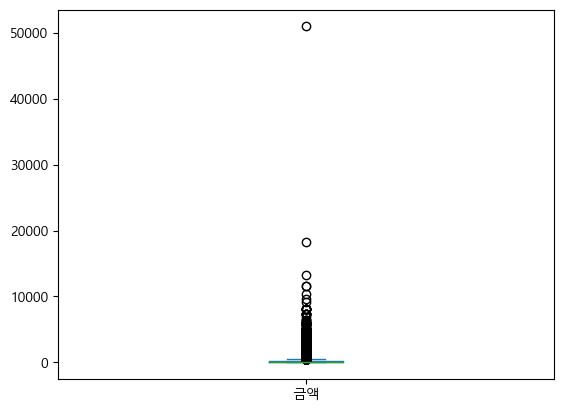

In [68]:
#df의 금액에 대해서 박스플랏으로 시각화하세요. 
df['금액'].plot.box()

In [69]:
# df의 금액컬럼에 대해 통계적 요약 정보를 출력하세요. 
df['금액'].describe()

count    1.578791e+06
mean     1.902040e+02
std      2.608200e+02
min      0.000000e+00
25%      2.500000e+01
50%      1.040000e+02
75%      2.540000e+02
max      5.092500e+04
Name: 금액, dtype: float64

In [83]:
### 적합도 검정 

# 예제 
day = df['일'].value_counts()
obs_freq = [day.Sunday, 
            day.Monday,
            day.Tuesday,
            day.Wednesday,
            day.Thursday,
            day.Friday,
            day.Saturday]

from scipy.stats import chisquare
result = chisquare(obs_freq)
print(result)
result.pvalue < 0.05 

# H0를 기각하지 못함. H0를 채택.균등 분포를 따른다. 요일간 차이가 있다고 볼수 없다.  

#- H0: 요일에 사건이 일어날 확률은 동일하다(균등분포를 따른다) 
#- H1: 요일에 사건이 일어날 확률은 동일하지 않다(균등분포를 따르지 않는다)

Power_divergenceResult(statistic=1563.357801386088, pvalue=0.0)


True